In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4\Data'

In [3]:
custs_ords_prods=pd.read_pickle(os.path.join(path, 'Prepared Data', 'custs_ords_prods.pkl'), compression= 'infer')

# 01 Bar chart, histogram, scatterplot, line graph

<Axes: xlabel='orders_day_of_week'>

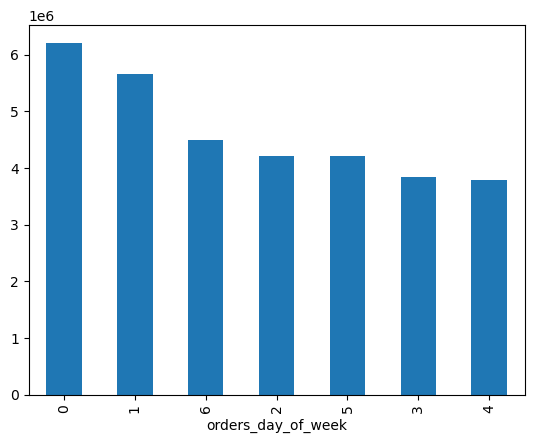

In [5]:
#creating a bar chart for categorical data
custs_ords_prods['orders_day_of_week'].value_counts().plot.bar()

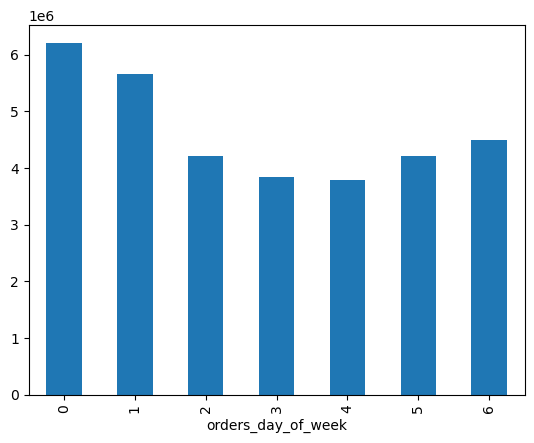

In [7]:
#putting the days of the week in order using the sort_index fxn
bar=custs_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='prices', ylabel='prices'>

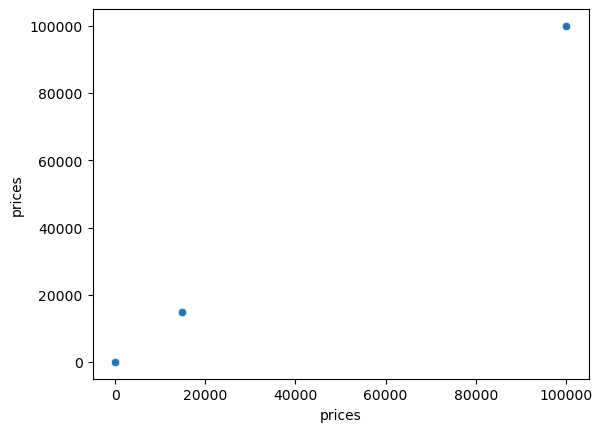

In [8]:
#creating a scatterplot
sns.scatterplot(x='prices', y='prices', data=custs_ords_prods)

In [14]:
#marking the outlier prices as missing
custs_ords_prods.loc[custs_ords_prods['prices'] >100, 'prices'] = np.nan

<Axes: xlabel='prices', ylabel='prices'>

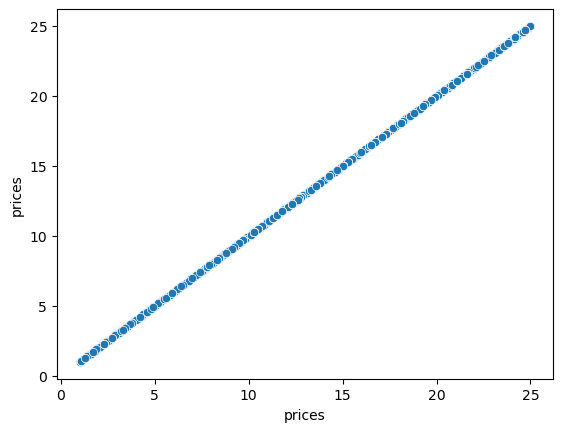

In [10]:
#creating a scatterplot without the outliers
sns.scatterplot(x='prices', y='prices', data=custs_ords_prods)

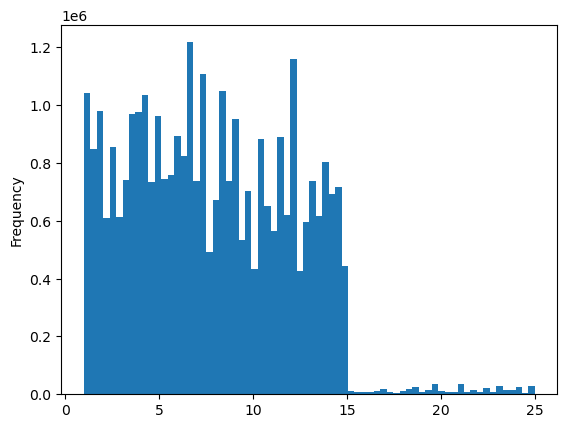

In [14]:
#plotting the histogram after removing the outliers
hist=custs_ords_prods['prices'].plot.hist(bins=70)

In [4]:
#sampling data- when using the whole set takes up too much RAM
np.random.seed(4)
dev=np.random.rand(len(custs_ords_prods)) <= 0.7

In [5]:
#store 70% in the dataframe big
big=custs_ords_prods[dev]

In [6]:
#store 30% in the dataframe small
small=custs_ords_prods[~dev]

In [19]:
#speeding up processing time by reducing samples to only the necessary columns
df_2 = small[['orders_day_of_week','prices']]

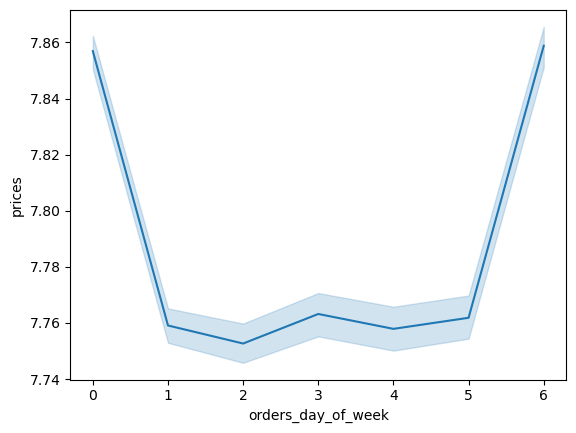

In [20]:
#creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

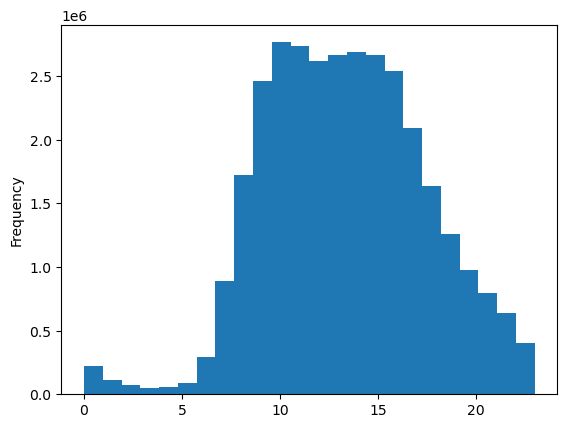

In [23]:
#histogram for order hour of day
hist=custs_ords_prods['order_hour'].plot.hist(bins=24)

In [7]:
newpath= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4'

In [ ]:
#the histogram shows us the busiest time for orders is roughly between 9am and 4pm

In [25]:
hist.figure.savefig(os.path.join(newpath, 'Analysis','Visualizations', 'hist_order_hour.png'))

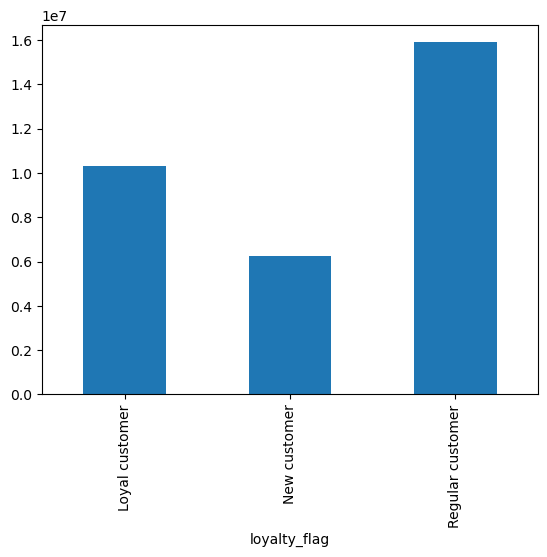

In [26]:
#bar chart order distribution by loyalty
bar=custs_ords_prods['loyalty_flag'].value_counts().sort_index().plot.bar()

In [27]:
#creating a df with specific columns for line chart
df_3 = small[['order_hour','prices']]

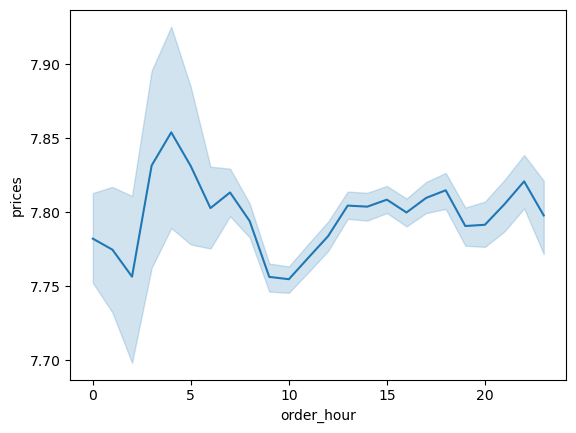

In [28]:
#creating line chart
line = sns.lineplot(data = df_3, x = 'order_hour',y = 'prices')

In [ ]:
#it appears that prices are highest in the early morning, around 4am

In [29]:
line.figure.savefig(os.path.join(newpath, 'Analysis','Visualizations', 'line_order_hour_prices.png'))

In [8]:
custs_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,frequency_flag,First Name,Last Name,Gender,STATE,Age,number_of_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,11.1,196,1,0,195.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,11.1,14084,2,0,14084.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,11.1,12427,3,0,12427.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,11.1,26088,4,0,26089.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,11.1,26405,5,0,26406.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [9]:
#creating a df with specific columns for line chart
df_4 = small[['Age','number_of_dependants']]

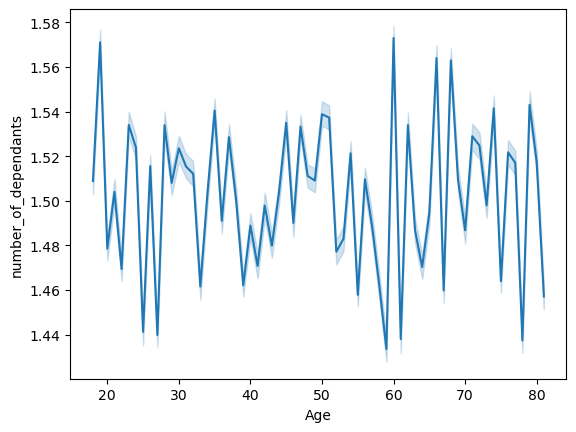

In [10]:
#creating a line chart to look at relationship between age and number of dependants
line1 = sns.lineplot(data = df_4, x = 'Age',y = 'number_of_dependants')

In [11]:
line1.figure.savefig(os.path.join(newpath, 'Analysis','Visualizations', 'line_age_dependants.png'))

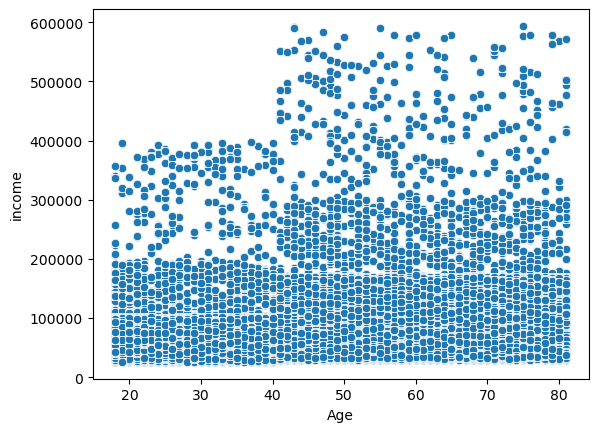

In [12]:
#creating a scatterplot to assess relationship between age and income
scatter=sns.scatterplot(x = 'Age', y = 'income',data = custs_ords_prods)

In [ ]:
#the scatterplot shows us that there's not a very strong relationship, however the largest incomes belong to the older customers, suggesting a moderate-positive relationship

In [13]:
scatter.figure.savefig(os.path.join(newpath, 'Analysis','Visualizations', 'scatter_age_income.png'))

In [15]:
custs_ords_prods.to_pickle(os.path.join(path, 'Prepared Data', 'custs_ords_prods.pkl'))